In [1]:
import pandas as pd 
import numpy as np
from numpy import absolute
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
print('done')

done


In [2]:
file_name = 'D:/ĐỒ ÁN/DoAn2/dữ liệu/data1/used_cars_data_update.csv'
df = pd.read_csv(file_name, index_col=0)
df.head(5)

,Mileage,Engine,Power,Seats,Ageofcar,Kilometers_Driven_log,Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
S.No.,,,,,,,,,,,,,,,,,,,,,
0,26.60,998,58.16,5.0,11,11.184421,0.559616,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,19.67,1582,126.20,5.0,6,10.621327,2.525729,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,18.20,1199,88.70,5.0,10,10.736397,1.504077,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,20.77,1248,88.76,7.0,9,11.373663,1.791759,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,15.20,1968,140.80,5.0,8,10.613246,2.875822,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [3]:
X = df.drop(["Price_log"], axis=1).values
y = df[["Price_log"]].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4213, 25)
X_test: (1806, 25)
y_train: (4213, 1)
y_test: (1806, 1)


In [5]:
print(y)

[[0.55961579]
 [2.52572864]
 [1.5040774 ]
 ...
 [1.06471074]
 [0.97455964]
 [0.91629073]]


In [6]:
regr = linear_model.LinearRegression(fit_intercept=True) 
regr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = regr.predict(X_test)
print(y_pred)

[[2.04300817]
 [1.20920668]
 [1.56615419]
 ...
 [1.98712001]
 [3.38184771]
 [1.63589338]]


Để kiểm chứng tốt hơn ta sẽ đánh giá qua các tham số sau: mean_absolute_error, mean_squared_error, r2_score

In [8]:
import math
#R-squared cho ta biết mức độ các biến đầu vào (biến đầu vào) sẽ giải thích được bao nhiêu phần trăm các biến mục tiêu. 
print("R-squared: ", r2_score(y_test,y_pred))
#Trung bình của sai biệt tuyệt đối
print("MAE: ",mean_absolute_error(y_test,y_pred))
#Căn bậc 2 của trung bình bình phương sai số 
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
LR_MAPE = MAPE(y_pred,y_test)
print("MAPE: ",LR_MAPE)

R-squared:  0.881106453034293
MAE:  0.2187651608028209
RMSE:  0.29910639401455374
MAPE:  17.61070851781964


Đánh giá độ tương quan giữa giá trị thực tế và giá trị dự đoán của mô hình qua đồ thị sau

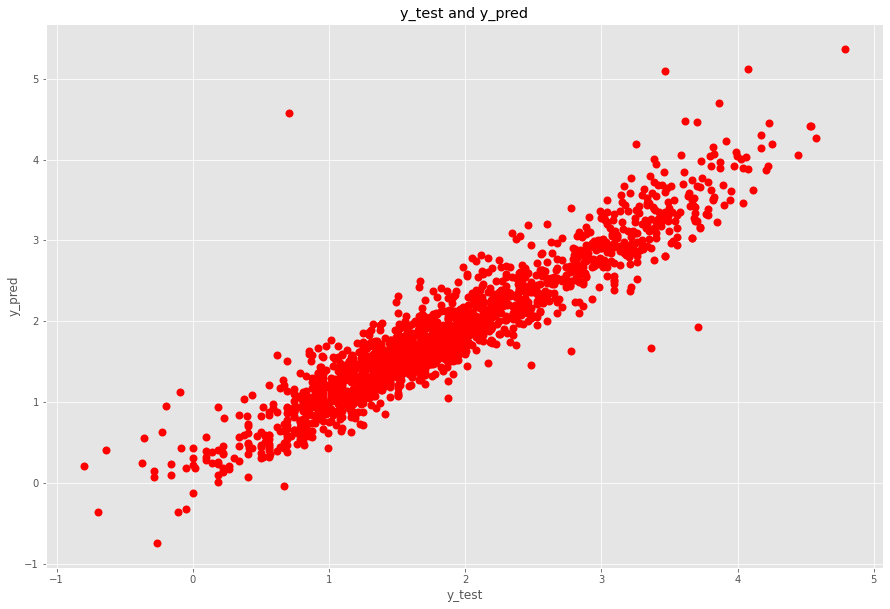

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred,color='red', linewidths = 2,marker ="o")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test and y_pred')
plt.savefig('D:/Linear.png')

In [14]:
Chenh_lech = pd.DataFrame(y_test[0:10])
Chenh_lech['Dự đoán'] = y_pred[0:10]
#Chenh_lech['Chênh lệch'] = Chenh_lech['Dự đoán'] - Chenh_lech['Price_log']
print(Chenh_lech, "\n")

          0   Dự đoán
0  1.981001  2.043008
1  1.446919  1.209207
2  1.360977  1.566154
3  2.129421  2.582777
4  2.601207  2.535338
5  1.446919  1.556327
6  1.677097  1.507254
7  0.512824  0.317932
8  1.321756  1.519635
9  1.178655  1.410860 



##### Ta có thể thấy giá trị dự đoán và giá trị thực tế khá là gần nhau 


In [15]:
X1 = df.drop(["Price_log","Power"], axis=1).values
y1 = df[["Price_log"]].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
regr = linear_model.LinearRegression(fit_intercept=True) 
regr.fit(X1_train,y1_train)
y1_pred = regr.predict(X1_test)
print(y1_pred)

[[1.9373649 ]
 [1.16930301]
 [1.66881957]
 ...
 [1.99023172]
 [3.51448402]
 [1.63150824]]


In [16]:
import math
#R-squared cho ta biết mức độ các biến đầu vào (biến đầu vào) sẽ giải thích được bao nhiêu phần trăm các biến mục tiêu. 
print("R-squared: ", r2_score(y1_test,y1_pred))
#Trung bình của sai biệt tuyệt đối
print("MAE: ",mean_absolute_error(y1_test,y1_pred))
#Căn bậc 2 của trung bình bình phương sai số 
print("RMSE: ", math.sqrt(mean_squared_error(y1_test,y1_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
LR_MAPE1 = MAPE(y1_pred,y1_test)
print("MAPE: ",LR_MAPE1)

R-squared:  0.8590396583353892
MAE:  0.24613371752964477
RMSE:  0.3256829529608451
MAPE:  19.9819562800351
